## PREp

TABLE OF CONTYENTS

INTRO

SERTUP

In [30]:
import random
from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os
import tensorflow as tf

2025-05-21 17:31:17.623114: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-21 17:31:17.623362: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-21 17:31:17.769488: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-21 17:31:18.074281: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-21 17:31:20.190336: W tensorflow/compiler/tf2

Generating synthetic data

In [4]:
# Directories
img_dir = "shape_dataset/images"
ann_dir = "shape_dataset/annotations"
os.makedirs(img_dir, exist_ok=True)
os.makedirs(ann_dir, exist_ok=True)

# Image and shape parameters
img_size = 64
shape_size = 10
num_images = 50  # Number of images to generate

# Function to create bounding box XML
def create_voc_xml(filename, width, height, bbox, shape_name, folder="images"):
    annotation = ET.Element("annotation")
    ET.SubElement(annotation, "folder").text = folder
    ET.SubElement(annotation, "filename").text = filename
    ET.SubElement(annotation, "path").text = os.path.join(folder, filename)

    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "3"

    ET.SubElement(annotation, "segmented").text = "0"

    obj = ET.SubElement(annotation, "object")
    ET.SubElement(obj, "name").text = shape_name
    ET.SubElement(obj, "pose").text = "Unspecified"
    ET.SubElement(obj, "truncated").text = "0"
    ET.SubElement(obj, "difficult").text = "0"

    bndbox = ET.SubElement(obj, "bndbox")
    ET.SubElement(bndbox, "xmin").text = str(bbox[0])
    ET.SubElement(bndbox, "ymin").text = str(bbox[1])
    ET.SubElement(bndbox, "xmax").text = str(bbox[2])
    ET.SubElement(bndbox, "ymax").text = str(bbox[3])

    return ET.ElementTree(annotation)

# Function to draw shapes (circle or square) and return the bounding box
def draw_shape(img_size, shape_type="square"):
    shape_size = 10
    img = Image.new("RGB", (img_size, img_size), (255, 255, 255))
    draw = ImageDraw.Draw(img)

    x, y = random.randint(shape_size, img_size - shape_size), random.randint(shape_size, img_size - shape_size)
    xmin, ymin = x - shape_size, y - shape_size
    xmax, ymax = x + shape_size, y + shape_size

    if shape_type == "square":
        draw.rectangle([xmin, ymin, xmax, ymax], fill=(255, 0, 0))
    elif shape_type == "circle":
        draw.ellipse([xmin, ymin, xmax, ymax], fill=(0, 0, 255))

    return img, (xmin, ymin, xmax, ymax), shape_type

# Generate images and annotations
for i in range(num_images):
    shape_type = random.choice(["square", "circle"])
    img, bbox, shape_name = draw_shape(img_size, shape_type)
    img_filename = f"{i:04d}.png"
    img.save(os.path.join(img_dir, img_filename))

    xml_filename = f"{i:04d}.xml"
    tree = create_voc_xml(img_filename, img_size, img_size, bbox, shape_name)
    tree.write(os.path.join(ann_dir, xml_filename))


In [ ]:
# noe -> generates only one object per image

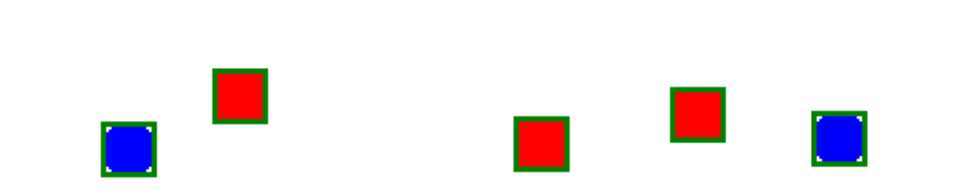

In [5]:
# Function to draw bounding box on an image for display
def draw_bbox(image_path, xml_path):
    img = Image.open(image_path).convert("RGB")
    tree = ET.parse(xml_path)
    root = tree.getroot()
    bndbox = root.find(".//bndbox")
    box = [int(bndbox.find(tag).text) for tag in ["xmin", "ymin", "xmax", "ymax"]]
    
    draw = ImageDraw.Draw(img)
    draw.rectangle(box, outline="green", width=2)
    return img

# Display a few images with bounding boxes
plt.figure(figsize=(10, 2))
for i, fname in enumerate(sorted(os.listdir(img_dir))[:5]):
    img_path = os.path.join(img_dir, fname)
    xml_path = os.path.join(ann_dir, fname.replace(".png", ".xml"))
    img_with_bbox = draw_bbox(img_path, xml_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img_with_bbox)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [8]:
!ls shape_dataset/images

0000.png  0007.png  0014.png  0021.png	0028.png  0035.png  0042.png  0049.png
0001.png  0008.png  0015.png  0022.png	0029.png  0036.png  0043.png
0002.png  0009.png  0016.png  0023.png	0030.png  0037.png  0044.png
0003.png  0010.png  0017.png  0024.png	0031.png  0038.png  0045.png
0004.png  0011.png  0018.png  0025.png	0032.png  0039.png  0046.png
0005.png  0012.png  0019.png  0026.png	0033.png  0040.png  0047.png
0006.png  0013.png  0020.png  0027.png	0034.png  0041.png  0048.png


In [33]:
# plot an image
image_path = img_dir + "/0000.png"

In [9]:
!ls shape_dataset/annotations # are xmls

0000.xml  0007.xml  0014.xml  0021.xml	0028.xml  0035.xml  0042.xml  0049.xml
0001.xml  0008.xml  0015.xml  0022.xml	0029.xml  0036.xml  0043.xml
0002.xml  0009.xml  0016.xml  0023.xml	0030.xml  0037.xml  0044.xml
0003.xml  0010.xml  0017.xml  0024.xml	0031.xml  0038.xml  0045.xml
0004.xml  0011.xml  0018.xml  0025.xml	0032.xml  0039.xml  0046.xml
0005.xml  0012.xml  0019.xml  0026.xml	0033.xml  0040.xml  0047.xml
0006.xml  0013.xml  0020.xml  0027.xml	0034.xml  0041.xml  0048.xml


In [14]:
ann_path = ann_dir + "/0000.xml"

In [15]:
with open(ann_path, 'r') as file:
    print(file.read())


<annotation><folder>images</folder><filename>0000.png</filename><path>images/0000.png</path><size><width>64</width><height>64</height><depth>3</depth></size><segmented>0</segmented><object><name>circle</name><pose>Unspecified</pose><truncated>0</truncated><difficult>0</difficult><bndbox><xmin>34</xmin><ymin>42</ymin><xmax>54</xmax><ymax>62</ymax></bndbox></object></annotation>


In [23]:
import xml.dom.minidom

with open(ann_path, 'r') as file:
    xml_string = file.read()

# Parse and pretty-print
dom = xml.dom.minidom.parseString(xml_string)
pretty_xml = dom.toprettyxml()

print(pretty_xml)


<?xml version="1.0" ?>
<annotation>
	<folder>images</folder>
	<filename>0000.png</filename>
	<path>images/0000.png</path>
	<size>
		<width>64</width>
		<height>64</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>circle</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>34</xmin>
			<ymin>42</ymin>
			<xmax>54</xmax>
			<ymax>62</ymax>
		</bndbox>
	</object>
</annotation>



In [28]:
# Extract object annotations
for obj in root.findall("object"):
    name = obj.find("name").text
    bndbox = obj.find("bndbox")
    xmin = int(bndbox.find("xmin").text)
    ymin = int(bndbox.find("ymin").text)
    xmax = int(bndbox.find("xmax").text)
    ymax = int(bndbox.find("ymax").text)
    
    print(f"Object: {name}, BBox: ({xmin}, {ymin}, {xmax}, {ymax})")


Object: circle, BBox: (34, 42, 54, 62)


## Imahe pre-processing

- Read
- Decode
- Cast
- Normalize


In [38]:
img_path = image_path

img = tf.io.read_file(img_path)
img = tf.image.decode_png(img, channels=3)

# cast and normalizes to [0, 1] if the original image is an integer type (whcih it is in our case)
img = tf.image.convert_image_dtype(img, tf.float32)

In [37]:
img

<tf.Tensor: shape=(64, 64, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

## Annotation pre-processing

We need to parse the XML.

- Identify the object class (e.g., square, circle) and encode it numerically.
- Extract the coordinates of the bounding box.
- Normalize the bounding box coordinates to the [0, 1] range.



In [40]:
tree = ET.parse(ann_path)
root = tree.getroot()
 

In [46]:
label = root.find(".//name").text 

In [47]:
# encoding
label = 0 if label == "square" else 1 # square=0, circle=1

In [48]:
bbox = root.find(".//bndbox")
bbox

<Element 'bndbox' at 0x7c345804f470>

In [49]:
xmin = int(bbox.find("xmin").text)
ymin = int(bbox.find("ymin").text)
xmax = int(bbox.find("xmax").text)
ymax = int(bbox.find("ymax").text)

xmin, ymin, xmax, ymax

(34, 42, 54, 62)

In [50]:
# 64 is the img. size
bbox_norm = [xmin / 64, ymin / 64, xmax / 64, ymax / 64]
bbox_norm

[0.53125, 0.65625, 0.84375, 0.96875]

In [51]:
# in one function
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    label = root.find(".//name").text
    label = 0 if label == "square" else 1  # square=0, circle=1

    bbox = root.find(".//bndbox")
    xmin = int(bbox.find("xmin").text)
    ymin = int(bbox.find("ymin").text)
    xmax = int(bbox.find("xmax").text)
    ymax = int(bbox.find("ymax").text)

    # Normalize bbox coordinates to [0, 1]
    bbox_norm = [xmin / 64, ymin / 64, xmax / 64, ymax / 64]
    return label, bbox_norm

## Load an example

In [52]:
def load_example(img_path, label, bbox):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)  # scale [0,1] the image
    return img, {"label": label, "bbox": bbox}


In [55]:
label , bbox = parse_xml(ann_path)

img, ann = load_example(img_path, label, bbox)

In [57]:
ann

{'label': 1, 'bbox': [0.53125, 0.65625, 0.84375, 0.96875]}

## TF DATASEWST

In [59]:
#This code builds a list of labeled image samples with their corresponding bounding boxes,

samples = []
for fname in sorted(os.listdir(img_dir)):
    if fname.endswith(".png"):
        img_path = os.path.join(img_dir, fname)                         # Path to image
        xml_path = os.path.join(ann_dir, fname.replace(".png", ".xml")) # Matching annotation path
        label, bbox = parse_xml(xml_path)                               # Extract label and bbox from XML
        samples.append((img_path, label, bbox))                         # Save as a tuple




In [65]:
samples[:7]

[('shape_dataset/images/0015.png', 1, [0.21875, 0.328125, 0.53125, 0.640625]),
 ('shape_dataset/images/0001.png', 0, [0.03125, 0.34375, 0.34375, 0.65625]),
 ('shape_dataset/images/0010.png',
  0,
  [0.140625, 0.484375, 0.453125, 0.796875]),
 ('shape_dataset/images/0034.png', 0, [0.625, 0.078125, 0.9375, 0.390625]),
 ('shape_dataset/images/0005.png',
  0,
  [0.203125, 0.296875, 0.515625, 0.609375]),
 ('shape_dataset/images/0004.png', 1, [0.078125, 0.59375, 0.390625, 0.90625]),
 ('shape_dataset/images/0000.png', 1, [0.53125, 0.65625, 0.84375, 0.96875])]

In [66]:
# train/test split
random.shuffle(samples)
split_idx = int(0.8 * len(samples))
train_samples = samples[:split_idx]
val_samples = samples[split_idx:]

In [67]:
def make_dataset(samples, batch_size=4, training=True):
    img_paths, labels, bboxes = zip(*samples)
    ds = tf.data.Dataset.from_tensor_slices((list(img_paths), list(labels), list(bboxes)))
    ds = ds.map(lambda x, y, z: load_example(x, y, z))
    
    if training:
        ds = ds.shuffle(100)
        
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds


In [69]:
train_ds = make_dataset(train_samples, batch_size=1)
val_ds = make_dataset(val_samples, batch_size=1, training=False)

train_ds and val_ds are tf.data.Dataset objects.

Each item is a tuple:
(image, {"label": shape_class, "bbox": normalized_box})

In [71]:
for images, targets in train_ds.take(1):
    print("Images:", images.shape)
    print("targets:", targets)


Images: (1, 64, 64, 3)
targets: {'label': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>, 'bbox': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.5625  , 0.359375, 0.875   , 0.671875]], dtype=float32)>}


In [72]:
for images, targets in train_ds.take(1):
    print("Images:", images.shape)
    print("Labels:", targets["label"])
    print("BBoxes:", targets["bbox"])


Images: (1, 64, 64, 3)
Labels: tf.Tensor([0], shape=(1,), dtype=int32)
BBoxes: tf.Tensor([[0.6875   0.390625 1.       0.703125]], shape=(1, 4), dtype=float32)


If each item muste be:

(image_tensor, {"classification": int_label, "bounding_box": [xmin, ymin, xmax, ymax]})



not:

(image_tensor, {"label": ..., "bbox": ...})

I can remap keys

In [73]:
def remap_keys(img, targets):
    return img, {
        "classification": targets["label"],
        "bounding_box": targets["bbox"]
    }

train_ds = train_ds.map(remap_keys)
val_ds = val_ds.map(remap_keys)

In [74]:
for images, targets in train_ds.take(1):
    print("Images:", images.shape)
    print("targets:", targets)

Images: (1, 64, 64, 3)
targets: {'classification': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>, 'bounding_box': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.234375, 0.265625, 0.546875, 0.578125]], dtype=float32)>}


In [75]:
for images, targets in train_ds.take(1):
    print("Images:", images.shape)
    print("Classification:", targets["classification"])
    print("BBoxes:", targets["bounding_box"])

Images: (1, 64, 64, 3)
Classification: tf.Tensor([1], shape=(1,), dtype=int32)
BBoxes: tf.Tensor([[0.546875 0.28125  0.859375 0.59375 ]], shape=(1, 4), dtype=float32)
